In [178]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import ipdb
from itertools import chain
%matplotlib inline
plt.style.use('ggplot')
np.random.seed(1234)

np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [179]:
from IPython.display import Image
from numpy.core.umath_tests import matrix_multiply as mm

In [180]:
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom
from scipy.stats import multivariate_normal as mvn

In [181]:
def f(x, y, mu):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.2*st.multivariate_normal([mu,2], 1*np.eye(2)).pdf(z) +
            0.8*st.multivariate_normal([2,-mu], 1*np.eye(2)).pdf(z))

In [182]:
import func

In [183]:
np.random.seed(123)
# create data set
n = 100
mu = 4
_mus = np.array([[0,mu], [-mu,0]])
_sigmas = np.array([[[3, 0], [0, 0.5]], [[1,0],[0,2]]])
_pis = np.array([0.6, 0.4])
xs = np.concatenate([np.random.multivariate_normal(mu, sigma, int(pi*n))
                    for pi, mu, sigma in zip(_pis, _mus, _sigmas)])

In [184]:
pis, mus, sigmas = func.initialize()

#run algos
%run func.py

In [8]:
nbiter = n*3
ll1, pis1, mus1, sigmas1, estim_mus_em = func.em(xs, pis, mus, sigmas,max_iter=nbiter)

In [9]:
finalmus_em = [estim_mus_em[j][0][1] for j in range(len(estim_mus_em))]

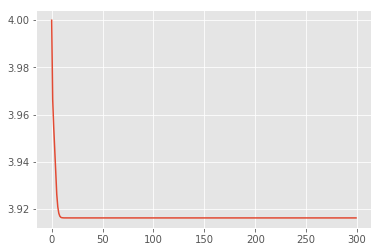

In [10]:
plt.plot(finalmus_em)

# IEM

run done


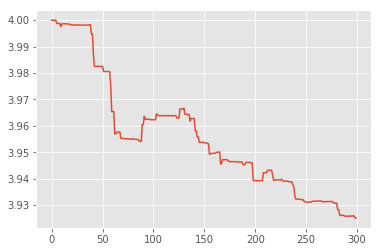

In [11]:
#init
nbiter = n*3
ll1, pis1, mus1, sigmas1, estim_mus_iem = func.iem(xs, pis, mus, sigmas,max_iter=nbiter)
print('run done')
finalmus_iem = [estim_mus_iem[j][0][1] for j in range(len(estim_mus_iem))]
plt.plot(finalmus_iem)

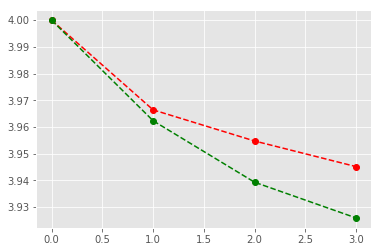

In [12]:
seq_epochs = range(0,nbiter-1, n-1)
plt.plot([ finalmus_em[index] for index in range(len(seq_epochs)) ] ,'ro--')
plt.plot([ finalmus_iem[index] for index in seq_epochs ] ,'go--')

# OEM

In [51]:
pis, mus, sigmas = func.initialize()

In [195]:
%run func.py

In [213]:
%run func.py
nbiter = n*3
rho = [float(0.3/(x+10)) for x in range(0,nbiter)]
ll1, pis1, mus1, sigmas1, estim_mus_oem = oem(xs, pis, mus, sigmas, stepsize= rho,max_iter=nbiter)
print('run done')
finalmus_oem = [estim_mus_oem[j][0][1] for j in range(len(estim_mus_oem))]
#plt.plot(estim_mus_oem)

[0.496 0.504]
[0.484 0.516]
[0.495 0.505]
[0.485 0.515]
[0.491 0.509]
[0.499 0.501]
[0.490 0.510]
[0.488 0.512]
[0.491 0.509]
[0.484 0.516]
[0.491 0.509]
[0.498 0.502]
[0.504 0.496]
[0.498 0.502]
[0.501 0.499]
[0.495 0.505]
[0.490 0.510]
[0.485 0.515]
[0.480 0.520]
[0.485 0.515]
[0.480 0.520]
[0.485 0.515]
[0.486 0.514]
[0.482 0.518]
[0.478 0.522]
[0.480 0.520]
[0.482 0.518]
[0.486 0.514]
[0.482 0.518]
[0.486 0.514]
[0.490 0.510]
[0.486 0.514]
[0.483 0.517]
[0.487 0.513]
[0.484 0.516]
[0.487 0.513]
[0.484 0.516]
[0.481 0.519]
[0.480 0.520]
[0.484 0.516]
[0.486 0.514]
[0.489 0.511]
[0.486 0.514]
[0.489 0.511]
[0.492 0.508]
[0.495 0.505]
[0.492 0.508]
[0.490 0.510]
[0.487 0.513]
[0.490 0.510]
[0.492 0.508]
[0.490 0.510]
[0.487 0.513]
[0.490 0.510]
[0.489 0.511]
[0.491 0.509]
[0.493 0.507]
[0.496 0.504]
[0.493 0.507]
[0.491 0.509]
[0.489 0.511]
[0.491 0.509]
[0.489 0.511]
[0.490 0.510]
[0.488 0.512]
[0.486 0.514]
[0.488 0.512]
[0.490 0.510]
[0.488 0.512]
[0.486 0.514]
[0.485 0.515]
[0.486

<string>:223: RuntimeWarning: divide by zero encountered in divide
<string>:232: RuntimeWarning: invalid value encountered in multiply


ValueError: array must not contain infs or NaNs

In [211]:
seq_epochs = range(0,nbiter,n-1)

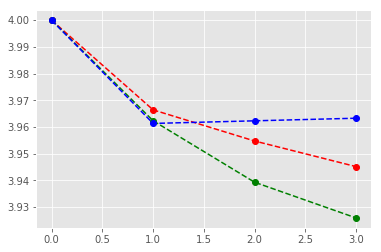

In [212]:
plt.plot([ finalmus_em[index] for index in range(len(seq_epochs)) ] ,'ro--')
plt.plot([ finalmus_iem[index] for index in seq_epochs ] ,'go--')
plt.plot([ finalmus_oem[index] for index in seq_epochs ] ,'bo--')

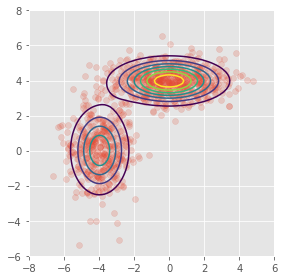

In [73]:
intervals = 101
ys = np.linspace(-8,8,intervals)
X, Y = np.meshgrid(ys, ys)
_ys = np.vstack([X.ravel(), Y.ravel()]).T

z = np.zeros(len(_ys))
for pi, mu, sigma in zip(pis1, mus1, sigmas1):
    z += pi*mvn(mu, sigma).pdf(_ys)
z = z.reshape((intervals, intervals))

ax = plt.subplot(111)
plt.scatter(xs[:,0], xs[:,1], alpha=0.2)
plt.contour(X, Y, z, N=10)
plt.axis([-8,6,-6,8])
ax.axes.set_aspect('equal')
plt.tight_layout()